In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')
import graphviz 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score,classification_report , roc_auc_score,make_scorer
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
import xgboost 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')


In [2]:
leg = pd.read_excel("H:/EXCEL/ALL - Copy.xlsx")

In [3]:
leg

,League,Match no,Team1,Team2,Win
0,1.0,1.0,JUVENTUS,BARCELONA,1.0
1,1.0,2.0,LIVERPOOL,MAN CITY,0.0
2,1.0,3.0,ATM,REAL MADRID,1.0
3,1.0,4.0,MAN UTD,PSG,2.0
4,1.0,5.0,JUVENTUS,BAYERN MUNICH,1.0
...,...,...,...,...,...
3993,0.0,0.0,0,0,2.0
3994,0.0,0.0,0,0,2.0
3995,0.0,0.0,0,0,2.0
3996,0.0,0.0,0,0,2.0


# Data Preprocessing

In [4]:
# print the shape
print(leg.shape)

#runs the first 5 rows
leg.head()

(3998, 5)


,League,Match no,Team1,Team2,Win
0,1.0,1.0,JUVENTUS,BARCELONA,1.0
1,1.0,2.0,LIVERPOOL,MAN CITY,0.0
2,1.0,3.0,ATM,REAL MADRID,1.0
3,1.0,4.0,MAN UTD,PSG,2.0
4,1.0,5.0,JUVENTUS,BAYERN MUNICH,1.0


In [5]:
leg.columns

Index(['League', 'Match no', 'Team1', 'Team2', 'Win'], dtype='object')

In [6]:
leg.dtypes

League      float64
Match no    float64
Team1        object
Team2        object
Win         float64
dtype: object

In [7]:
# Checking for null values

leg.isnull().sum()

League      1216
Match no    1216
Team1       1216
Team2       1216
Win         1216
dtype: int64

# Removing Null

In [8]:
# Deleting the NULL values
leg = leg.dropna(subset = ['Team1'])

In [9]:
leg.isnull().sum()

League      0
Match no    0
Team1       0
Team2       0
Win         0
dtype: int64

# Removing zero

In [10]:
leg.drop(leg[leg['Team1'] == '0'].index, inplace = True)

In [11]:
leg

,League,Match no,Team1,Team2,Win
0,1.0,1.0,JUVENTUS,BARCELONA,1.0
1,1.0,2.0,LIVERPOOL,MAN CITY,0.0
2,1.0,3.0,ATM,REAL MADRID,1.0
3,1.0,4.0,MAN UTD,PSG,2.0
4,1.0,5.0,JUVENTUS,BAYERN MUNICH,1.0
...,...,...,...,...,...
2777,15.0,778.0,JUVENTUS,BARCELONA,0.0
2778,15.0,779.0,MAN CITY,LIVERPOOL,0.0
2779,15.0,780.0,NAPOLI,JUVENTUS,1.0
2780,15.0,781.0,REAL MADRID,BARCELONA,2.0


In [12]:
# Investigate all the elements whithin each Feature 

for column in leg:
    unique_vals = np.unique(leg[column])
    nr_values = len(unique_vals)
    if nr_values < 15:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature League :15
The number of values for feature Match no :782
The number of values for feature Team1 :12 -- ['ATM' 'BARCELONA' 'BAYERN MUNICH' 'CHELSEA' 'JUVENTUS' 'LIVERPOOL'
 'MAN CITY' 'MAN UTD' 'NAPOLI' 'PSG' 'REAL MADRID' 'SPURS']
The number of values for feature Team2 :12 -- ['ATM' 'BARCELONA' 'BAYERN MUNICH' 'CHELSEA' 'JUVENTUS' 'LIVERPOOL'
 'MAN CITY' 'MAN UTD' 'NAPOLI' 'PSG' 'REAL MADRID' 'SPURS']
The number of values for feature Win :3 -- [0. 1. 2.]


In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
leg.head()

,League,Match no,Team1,Team2,Win
0,1.0,1.0,JUVENTUS,BARCELONA,1.0
1,1.0,2.0,LIVERPOOL,MAN CITY,0.0
2,1.0,3.0,ATM,REAL MADRID,1.0
3,1.0,4.0,MAN UTD,PSG,2.0
4,1.0,5.0,JUVENTUS,BAYERN MUNICH,1.0


In [15]:
# Making categorical variables into numeric representation

new_leg = pd.get_dummies(leg, columns = ['Team1','Team2'])
new_leg.head()
print(new_leg.shape)

(1566, 27)


In [16]:
new_leg.head()

,League,Match no,Win,Team1_ATM,Team1_BARCELONA,Team1_BAYERN MUNICH,Team1_CHELSEA,Team1_JUVENTUS,Team1_LIVERPOOL,Team1_MAN CITY,...,Team2_BAYERN MUNICH,Team2_CHELSEA,Team2_JUVENTUS,Team2_LIVERPOOL,Team2_MAN CITY,Team2_MAN UTD,Team2_NAPOLI,Team2_PSG,Team2_REAL MADRID,Team2_SPURS
0,1.0,1.0,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,3.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,4.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,5.0,1.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
# droping columns we don't need
#del new_leg['Match no']

In [18]:
new_leg

,League,Match no,Win,Team1_ATM,Team1_BARCELONA,Team1_BAYERN MUNICH,Team1_CHELSEA,Team1_JUVENTUS,Team1_LIVERPOOL,Team1_MAN CITY,...,Team2_BAYERN MUNICH,Team2_CHELSEA,Team2_JUVENTUS,Team2_LIVERPOOL,Team2_MAN CITY,Team2_MAN UTD,Team2_NAPOLI,Team2_PSG,Team2_REAL MADRID,Team2_SPURS
0,1.0,1.0,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,3.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,4.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,5.0,1.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,15.0,778.0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2778,15.0,779.0,0.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2779,15.0,780.0,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2780,15.0,781.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
new_leg.dtypes

League                 float64
Match no               float64
Win                    float64
Team1_ATM                uint8
Team1_BARCELONA          uint8
Team1_BAYERN MUNICH      uint8
Team1_CHELSEA            uint8
Team1_JUVENTUS           uint8
Team1_LIVERPOOL          uint8
Team1_MAN CITY           uint8
Team1_MAN UTD            uint8
Team1_NAPOLI             uint8
Team1_PSG                uint8
Team1_REAL MADRID        uint8
Team1_SPURS              uint8
Team2_ATM                uint8
Team2_BARCELONA          uint8
Team2_BAYERN MUNICH      uint8
Team2_CHELSEA            uint8
Team2_JUVENTUS           uint8
Team2_LIVERPOOL          uint8
Team2_MAN CITY           uint8
Team2_MAN UTD            uint8
Team2_NAPOLI             uint8
Team2_PSG                uint8
Team2_REAL MADRID        uint8
Team2_SPURS              uint8
dtype: object

# Feature Importance

In [20]:
# Split the data into X & y

X = new_leg.drop(['Win'], axis = 1).values
#X_columns = new_leg.drop(['Win'], axis = 1)
y = new_leg['Win'].astype(int)

print(X.shape)
print(y.shape)

(1566, 26)
(1566,)


In [21]:
X

array([[  1.,   1.,   0., ...,   0.,   0.,   0.],
       [  1.,   2.,   0., ...,   0.,   0.,   0.],
       [  1.,   3.,   1., ...,   0.,   1.,   0.],
       ...,
       [ 15., 780.,   0., ...,   0.,   0.,   0.],
       [ 15., 781.,   0., ...,   0.,   0.,   0.],
       [ 15., 782.,   0., ...,   0.,   0.,   0.]])

In [22]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

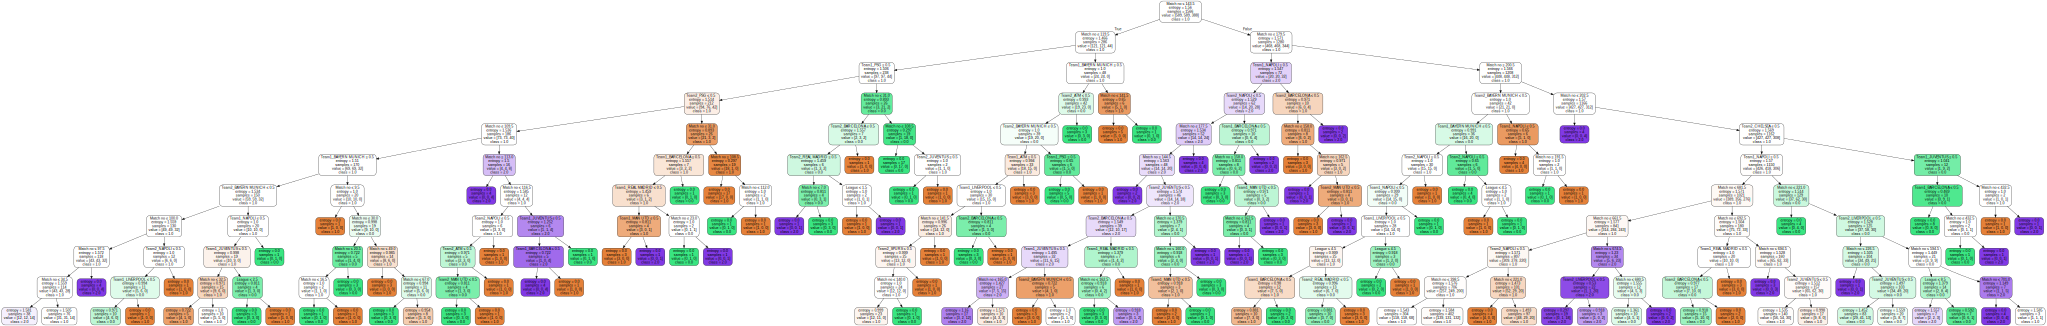

In [23]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_leg.drop('Win', axis=1).columns,    
    class_names=new_leg['Win'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [24]:
new_leg

,League,Match no,Win,Team1_ATM,Team1_BARCELONA,Team1_BAYERN MUNICH,Team1_CHELSEA,Team1_JUVENTUS,Team1_LIVERPOOL,Team1_MAN CITY,...,Team2_BAYERN MUNICH,Team2_CHELSEA,Team2_JUVENTUS,Team2_LIVERPOOL,Team2_MAN CITY,Team2_MAN UTD,Team2_NAPOLI,Team2_PSG,Team2_REAL MADRID,Team2_SPURS
0,1.0,1.0,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,3.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,4.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,5.0,1.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,15.0,778.0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2778,15.0,779.0,0.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2779,15.0,780.0,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2780,15.0,781.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
for i, column in enumerate(new_leg.drop('Win', axis=1)):
    print('Importance of feature {}:, {:.8f}'.format(column, dt.feature_importances_[i]))

Importance of feature League:, 0.03113852
Importance of feature Match no:, 0.53484467
Importance of feature Team1_ATM:, 0.00600576
Importance of feature Team1_BARCELONA:, 0.03129533
Importance of feature Team1_BAYERN MUNICH:, 0.02271787
Importance of feature Team1_CHELSEA:, 0.00000000
Importance of feature Team1_JUVENTUS:, 0.03547975
Importance of feature Team1_LIVERPOOL:, 0.00506681
Importance of feature Team1_MAN CITY:, 0.00000000
Importance of feature Team1_MAN UTD:, 0.01630457
Importance of feature Team1_NAPOLI:, 0.03636212
Importance of feature Team1_PSG:, 0.03895891
Importance of feature Team1_REAL MADRID:, 0.02364463
Importance of feature Team1_SPURS:, 0.00000000
Importance of feature Team2_ATM:, 0.00932666
Importance of feature Team2_BARCELONA:, 0.03078549
Importance of feature Team2_BAYERN MUNICH:, 0.02959775
Importance of feature Team2_CHELSEA:, 0.01251975
Importance of feature Team2_JUVENTUS:, 0.02665498
Importance of feature Team2_LIVERPOOL:, 0.01570122
Importance of featur

In [26]:

# Calculating FI
for i, column in enumerate(new_leg.drop('Win', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
#del final_fi     
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()           
final_fi

Importance of feature League:, 0.031
Importance of feature Match no:, 0.535
Importance of feature Team1_ATM:, 0.006
Importance of feature Team1_BARCELONA:, 0.031
Importance of feature Team1_BAYERN MUNICH:, 0.023
Importance of feature Team1_CHELSEA:, 0.000
Importance of feature Team1_JUVENTUS:, 0.035
Importance of feature Team1_LIVERPOOL:, 0.005
Importance of feature Team1_MAN CITY:, 0.000
Importance of feature Team1_MAN UTD:, 0.016
Importance of feature Team1_NAPOLI:, 0.036
Importance of feature Team1_PSG:, 0.039
Importance of feature Team1_REAL MADRID:, 0.024
Importance of feature Team1_SPURS:, 0.000
Importance of feature Team2_ATM:, 0.009
Importance of feature Team2_BARCELONA:, 0.031
Importance of feature Team2_BAYERN MUNICH:, 0.030
Importance of feature Team2_CHELSEA:, 0.013
Importance of feature Team2_JUVENTUS:, 0.027
Importance of feature Team2_LIVERPOOL:, 0.016
Importance of feature Team2_MAN CITY:, 0.000
Importance of feature Team2_MAN UTD:, 0.014
Importance of feature Team2_NAP

,index,Variable,Feature Importance Score
0,1,Match no,0.534845
1,11,Team1_PSG,0.038959
2,10,Team1_NAPOLI,0.036362
3,22,Team2_NAPOLI,0.035614
4,6,Team1_JUVENTUS,0.035480
5,3,Team1_BARCELONA,0.031295
6,0,League,0.031139
7,15,Team2_BARCELONA,0.030785
8,16,Team2_BAYERN MUNICH,0.029598
9,18,Team2_JUVENTUS,0.026655


In [27]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.97, test_size = 0.03, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1519, 26)
(47, 26)
(1519,)
(47,)


In [28]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.5075707702435813
Testing Accuracy is:  0.425531914893617


In [29]:
y_pred = dt.predict(X_train)

In [30]:
print(confusion_matrix(y_train, y_pred))

[[504  46  18]
 [388 170  17]
 [257  22  97]]


# plot_roc_curve

In [31]:
def plot_confusion_matrix(cm, classes=None,values_format = 'd',title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=2000.,fmt = 'd' ,annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=-500., vmax=9000.,fmt = 'd')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plotting Confusion Matrix

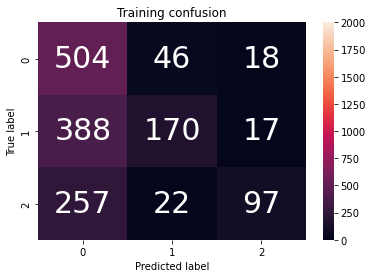

In [32]:
cm = confusion_matrix(y_train, y_pred)
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=dt.classes_,values_format='d',title='Training confusion')

In [33]:
accuracy_score(y_train, y_pred,normalize=True)

0.5075707702435813

# Extracting TN,TP,FP,FN

# confusion matrix metrics

In [34]:
matrix = classification_report(y_train, y_pred)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.44      0.89      0.59       568
           1       0.71      0.30      0.42       575
           2       0.73      0.26      0.38       376

    accuracy                           0.51      1519
   macro avg       0.63      0.48      0.46      1519
weighted avg       0.62      0.51      0.47      1519



# Running Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=1500, criterion='entropy',max_depth=None)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)

In [36]:
print("Training Accuracy is: ", rf.score(X_train, y_train))
print("Testing Accuracy is: ", rf.score(X_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.3617021276595745


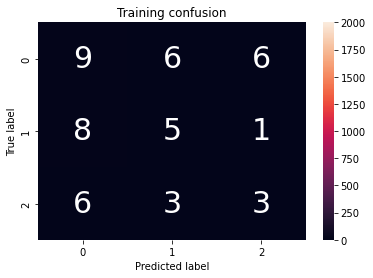

In [37]:
cm = confusion_matrix(y_test, prediction_test)
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')

# Train prediction

Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = None: 0.999:[568   0   0   0 575   0   1   0 375]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 2: 0.448:[248 320   0 143 432   0 124 252   0]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 3: 0.471:[292 276   0 151 424   0 141 235   0]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 4: 0.499:[327 241   0 146 429   0 156 218   2]
Classification accuracy on test set with n_estimators =50 & max features = 1 and max_depth = 5: 0.525:[372 196   0 152 423   0 157 216   3]
Classification accuracy on test set with n_estimators =50 & max features = sqrt and max_depth = None: 0.999:[568   0   0   0 575   0   1   0 375]
Classification accuracy on test set with n_estimators =50 & max features = sqrt and max_depth = 2: 0.452:[283 285   0 171 404   0 140 236   0]
Classifi

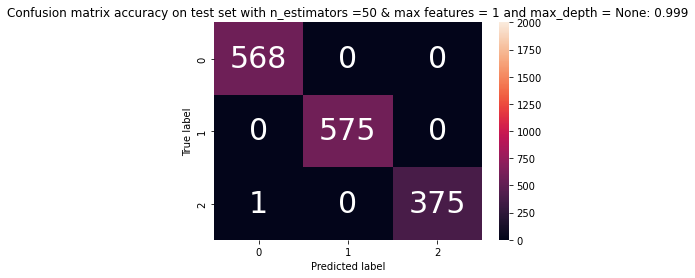

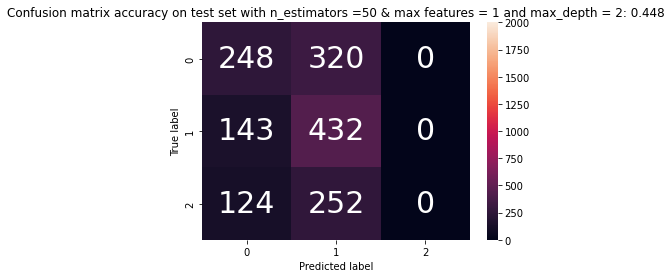

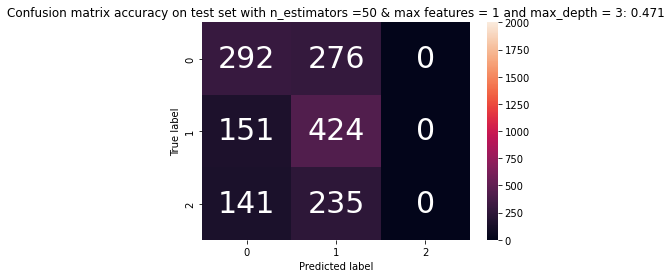

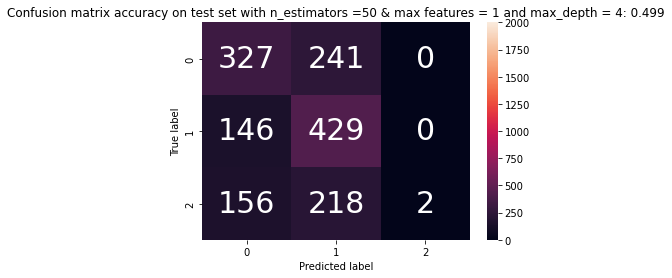

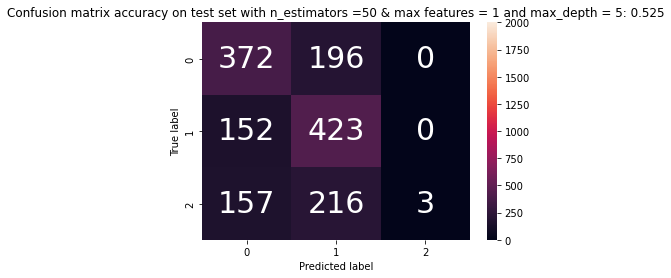

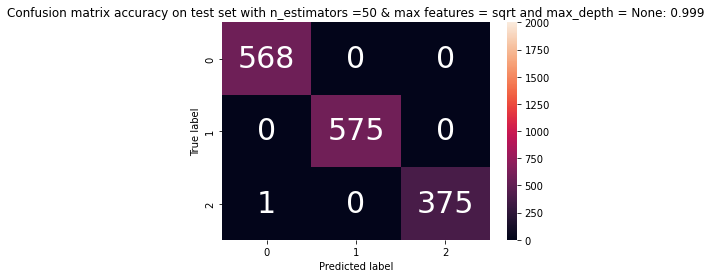

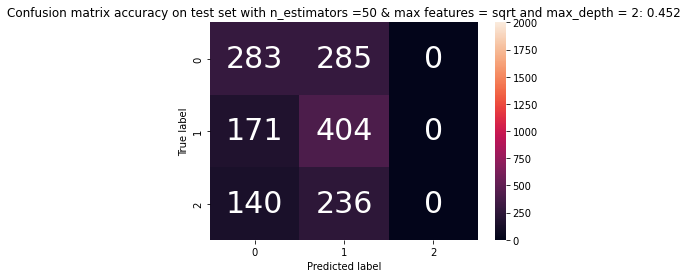

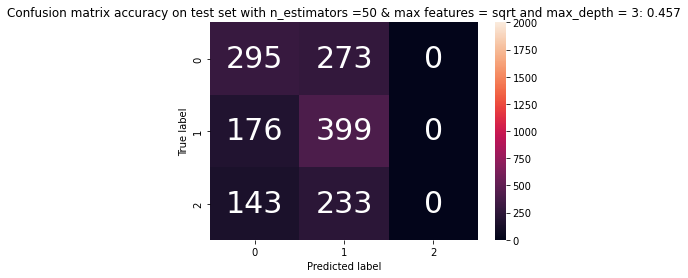

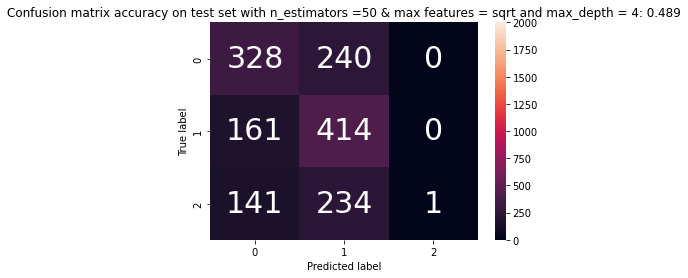

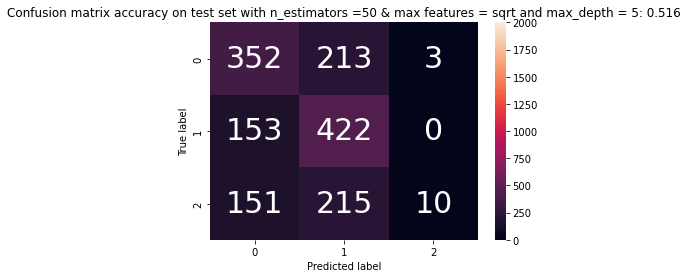

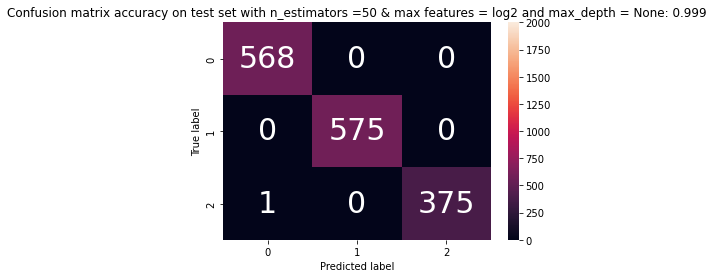

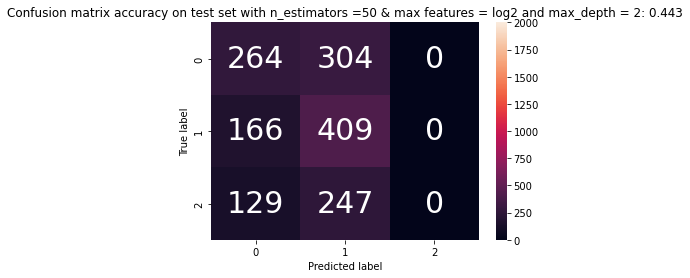

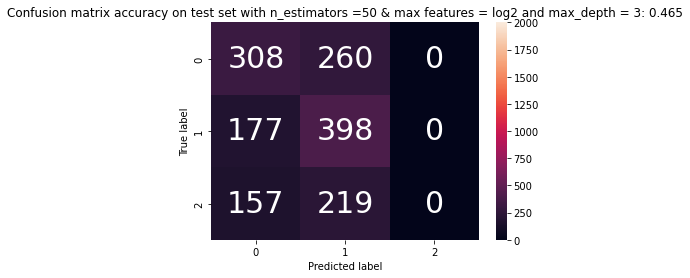

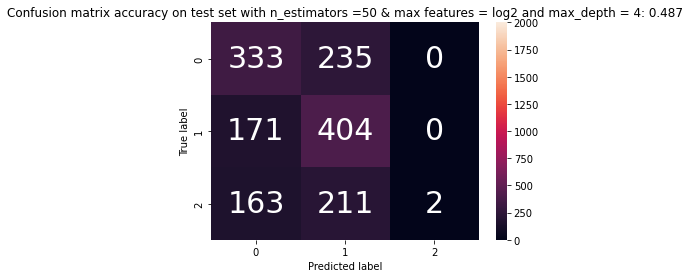

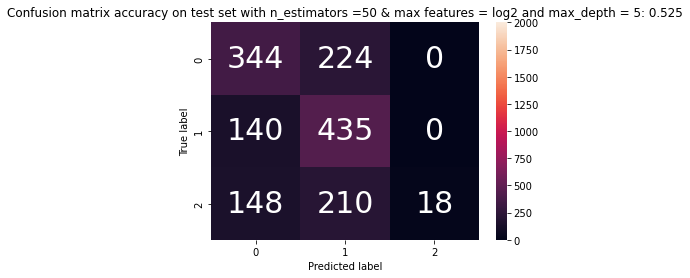

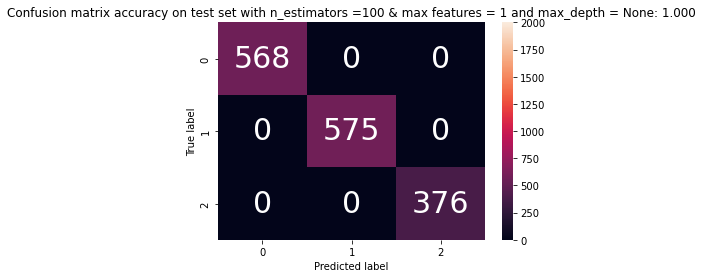

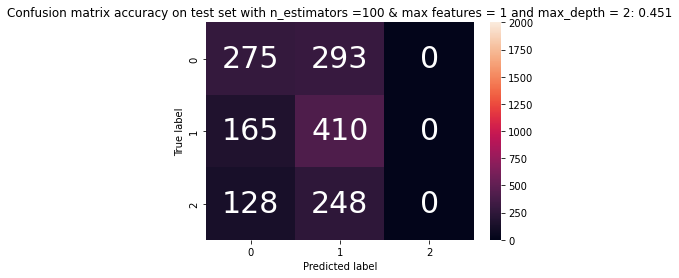

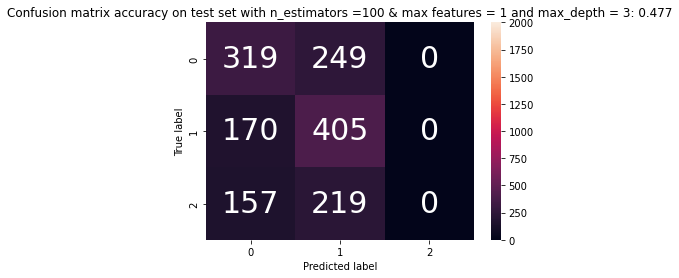

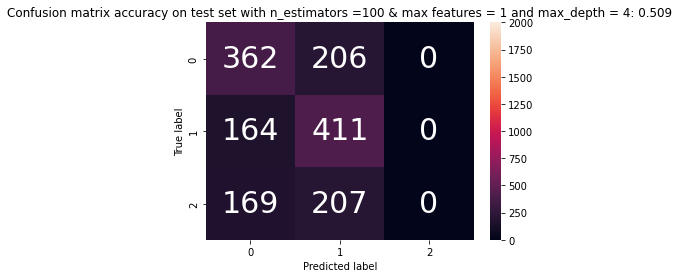

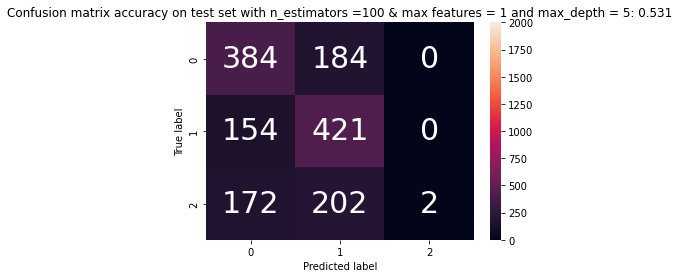

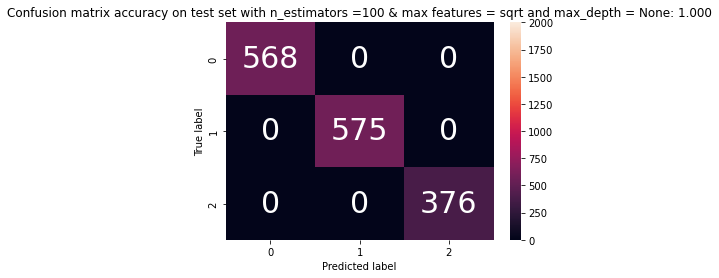

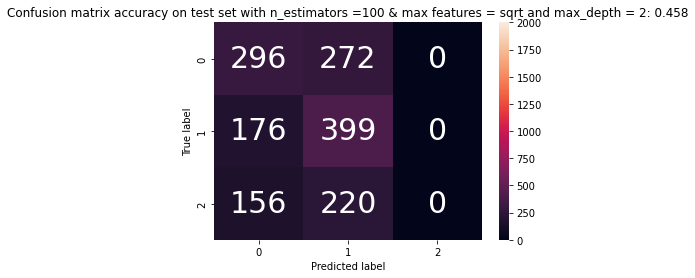

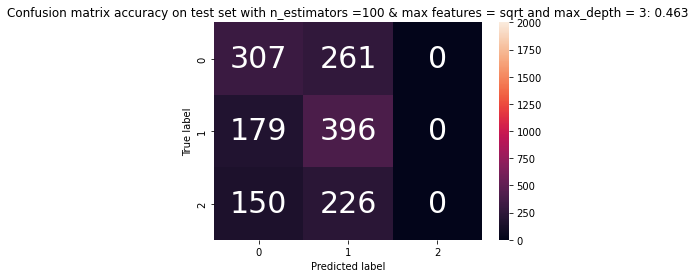

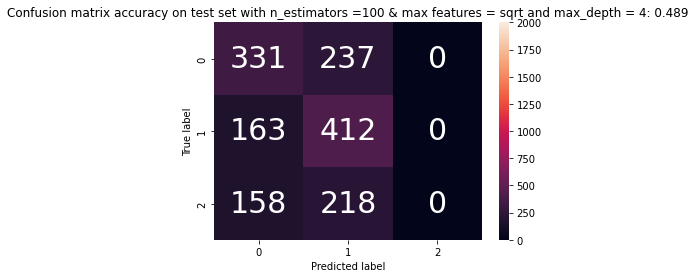

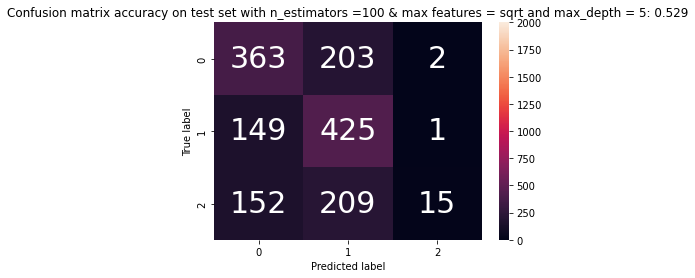

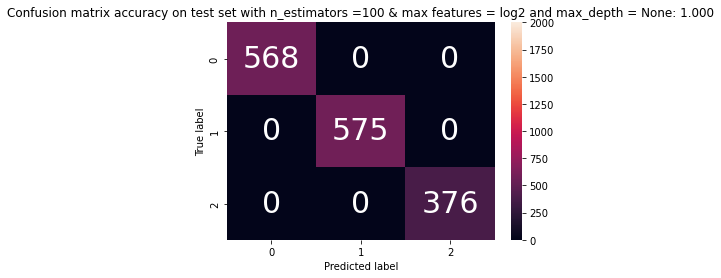

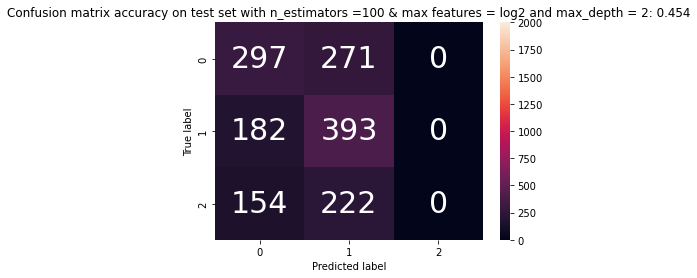

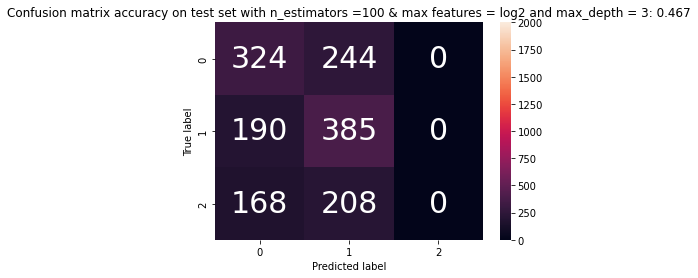

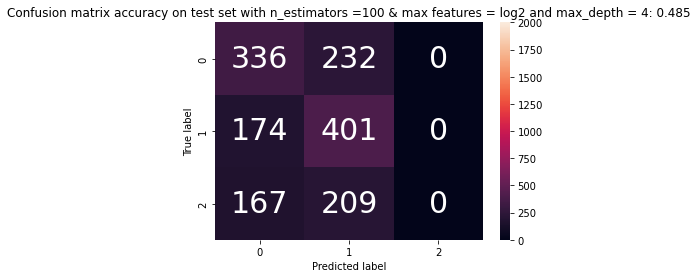

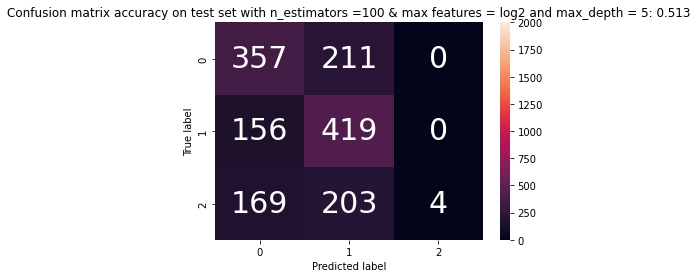

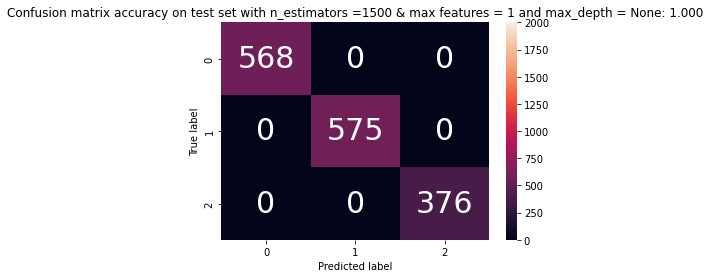

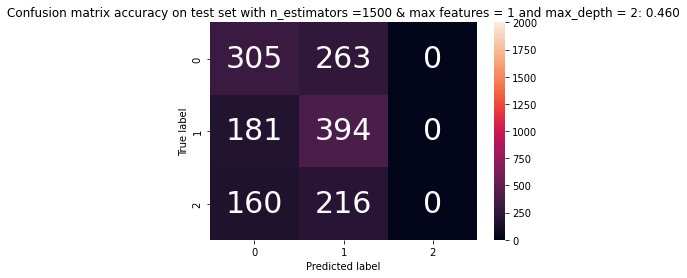

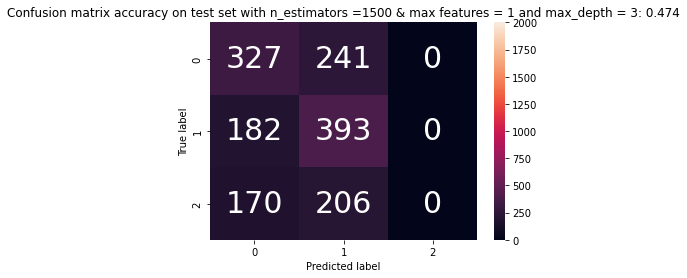

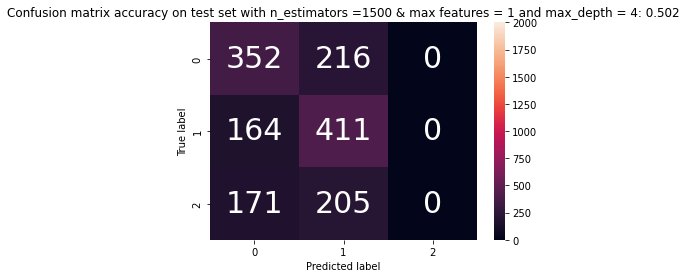

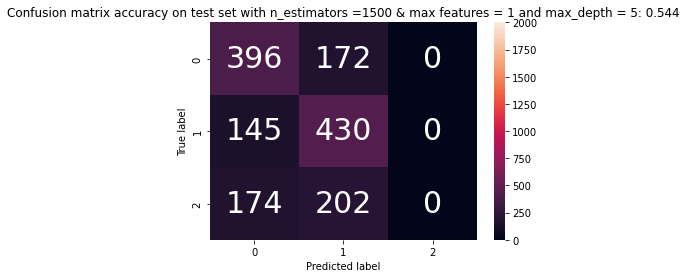

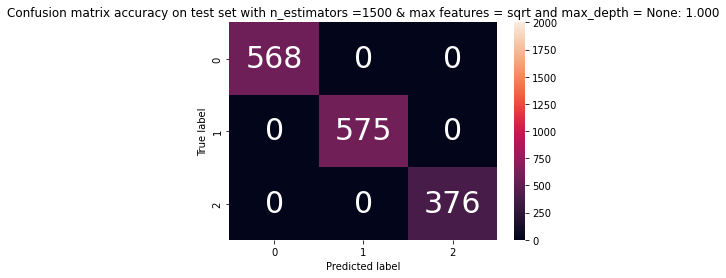

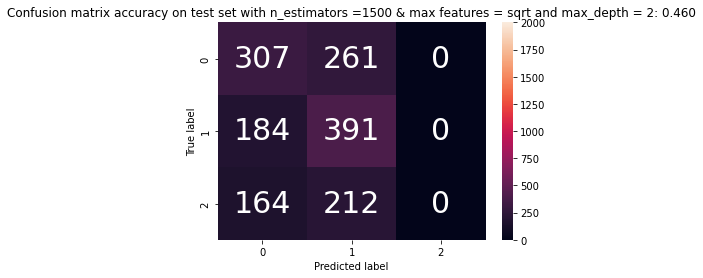

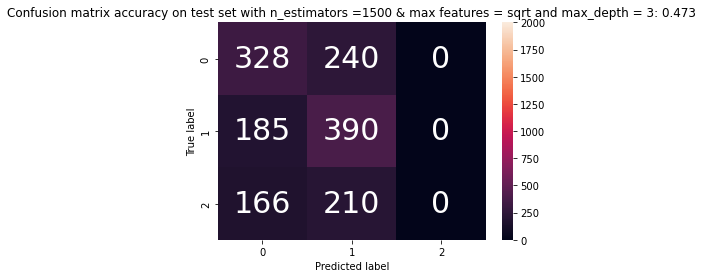

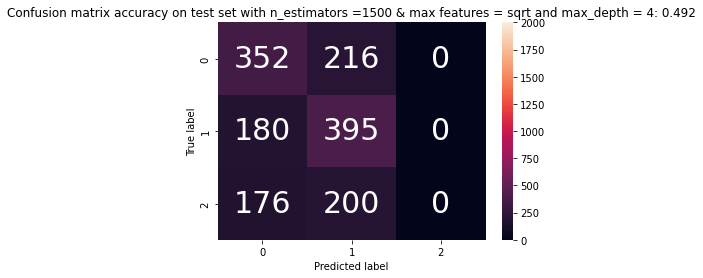

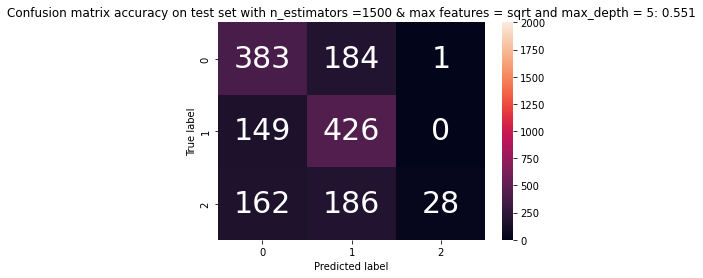

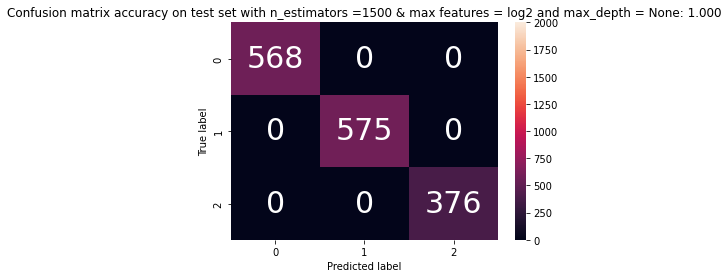

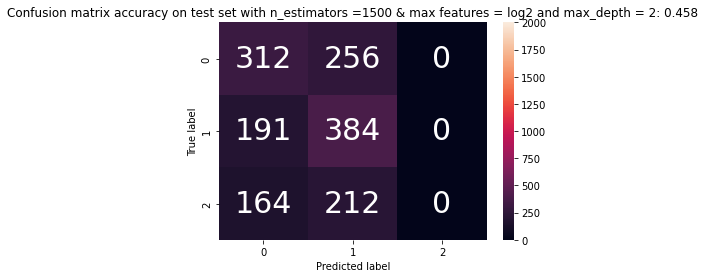

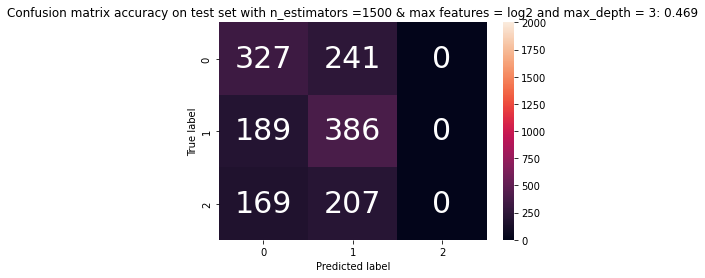

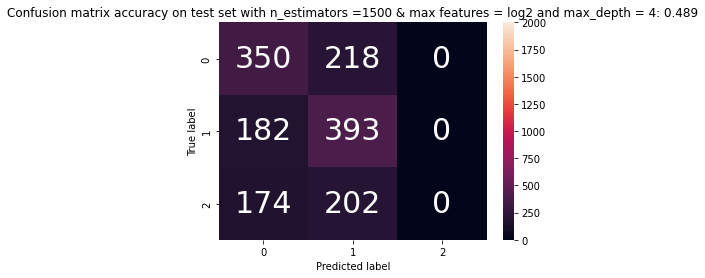

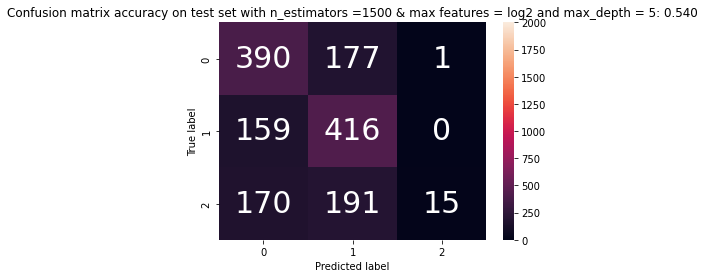

In [38]:
from itertools import product
n_estimators = [50,100,1500]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for n_estimators,f, d in product(n_estimators,max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=0)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X_train)
    print('Classification accuracy on test set with n_estimators ={} & max features = {} and max_depth = {}: {:.3f}:{}'.format(n_estimators,f, d, accuracy_score(y_train, prediction_test),confusion_matrix(y_train, prediction_test).ravel()))
    cm = confusion_matrix(y_train, prediction_test)
    #cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',
    title='Confusion matrix accuracy on test set with n_estimators ={} & max features = {} and max_depth = {}: {:.3f}'.format(n_estimators,f, d, accuracy_score(y_train, prediction_test)))


In [39]:
print("Training Accuracy is: ", rf.score(X_train, y_train))

Training Accuracy is:  0.5404871626069783


1.0

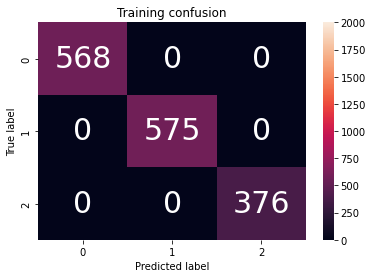

In [40]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=None, max_features ='sqrt' )
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_train)
cm = confusion_matrix(y_train, prediction_test)
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')
rf.score(X_train, y_train)

0.3404255319148936

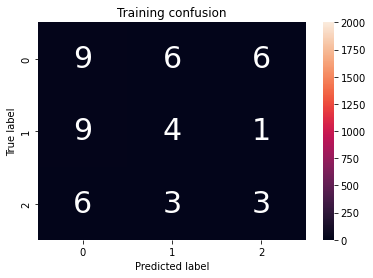

In [41]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=None, max_features =3)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)
cm = confusion_matrix(y_test, prediction_test)
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')
rf.score(X_test, y_test)

# XGBoost

In [42]:
classifier=xgboost.XGBClassifier(tree_method='hist')

In [43]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=2, min_child_weight=1;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=2, min_child_weight=1;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=2, min_child_weight=1;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=2, min_child_weight=1;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=2, min_child_weight=1;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=5;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=5;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamm

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [44]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}
clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.3, gamma

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [45]:
clf.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [46]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [47]:
final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0000000005, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=None, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=2000,
              n_jobs=0, num_parallel_tree=2, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0,tree_method='hist')

final_model.fit(X,y)
pred_xgboost = final_model.predict(X)
print("Training Accuracy is: ", final_model.score(X, y))

Training Accuracy is:  0.9885057471264368


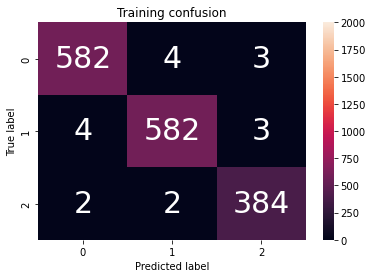

In [48]:
cm = confusion_matrix(y, pred_xgboost) 
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')

In [49]:
print("Training Accuracy is: ", final_model.score(X, y))

Training Accuracy is:  0.9885057471264368


# Train Predict

In [124]:
final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0005, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.14, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=None, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=2500,
              n_jobs=0, num_parallel_tree=2, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0,tree_method='hist')

final_model.fit(X_train,y_train)
pred_xgboost = final_model.predict(X_train)
print("Training Accuracy is: ", final_model.score(X_train, y_train))

Training Accuracy is:  0.9914417379855168


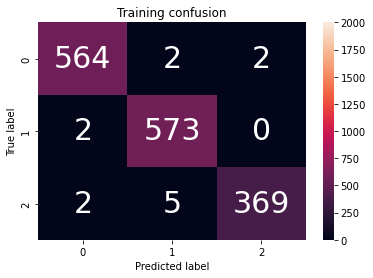

In [51]:
cm = confusion_matrix(y_train, pred_xgboost) 
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')

In [52]:
print("Training Accuracy is: ", final_model.score(X_train, y_train))

Training Accuracy is:  0.9914417379855168


# Test Predict

In [127]:
final_model1 = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0000000005, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=None, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=2500,
              n_jobs=0, num_parallel_tree=2, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0,tree_method='hist')

final_model1.fit(X_train,y_train)
pred_xgboost = final_model1.predict(X_test)
print("Testing Accuracy is: ", final_model1.score(X_test, y_test))

Testing Accuracy is:  0.2553191489361702


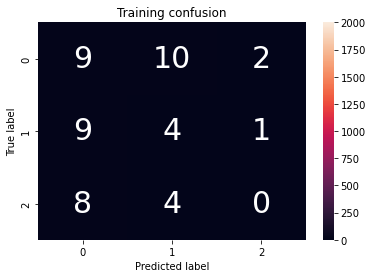

In [54]:
cm = confusion_matrix(y_test, pred_xgboost) 
#cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_,values_format='d',title='Training confusion')

In [55]:
print("Testing Accuracy is: ", final_model1.score(X_test, y_test))

Testing Accuracy is:  0.2765957446808511


In [128]:
print("Training Accuracy is: ", final_model.score(X_train, y_train))
print("Testing Accuracy is: ", final_model1.score(X_test, y_test))

Training Accuracy is:  0.9914417379855168
Testing Accuracy is:  0.2553191489361702


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

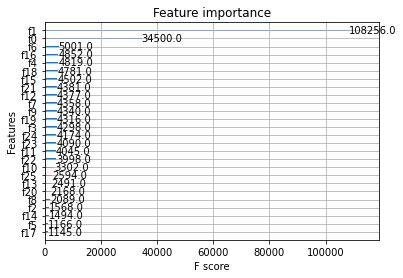

In [129]:
plot_importance(final_model)

In [98]:
leg2 = pd.read_excel('H:/EXCEL/16 predict.xlsx')
leg2.head()
#leg2.shape

,League,Match no,Team1,Team2
0,16,793,JUVENTUS,PSG
1,16,797,MAN CITY,REAL MADRID
2,16,803,MAN CITY,JUVENTUS
3,16,809,LIVERPOOL,PSG
4,16,810,LIVERPOOL,PSG


In [99]:
print(leg2.isnull().sum())

League      0
Match no    0
Team1       0
Team2       0
dtype: int64


In [100]:
leg21 = pd.get_dummies(leg2, columns = ['Team1','Team2'])

In [101]:
leg21.shape

(20, 26)

In [102]:
leg21.columns

Index(['League', 'Match no', 'Team1_ATM', 'Team1_BARCELONA',
       'Team1_BAYERN MUNICH', 'Team1_CHELSEA', 'Team1_JUVENTUS',
       'Team1_LIVERPOOL', 'Team1_MAN CITY', 'Team1_MAN UTD', 'Team1_NAPOLI',
       'Team1_PSG', 'Team1_REAL MADRID', 'Team1_SPURS', 'Team2_ATM',
       'Team2_BARCELONA', 'Team2_BAYERN MUNICH', 'Team2_CHELSEA',
       'Team2_JUVENTUS', 'Team2_LIVERPOOL', 'Team2_MAN CITY', 'Team2_MAN UTD',
       'Team2_NAPOLI', 'Team2_PSG', 'Team2_REAL MADRID', 'Team2_SPURS'],
      dtype='object')

In [103]:
leg21

,League,Match no,Team1_ATM,Team1_BARCELONA,Team1_BAYERN MUNICH,Team1_CHELSEA,Team1_JUVENTUS,Team1_LIVERPOOL,Team1_MAN CITY,Team1_MAN UTD,...,Team2_BAYERN MUNICH,Team2_CHELSEA,Team2_JUVENTUS,Team2_LIVERPOOL,Team2_MAN CITY,Team2_MAN UTD,Team2_NAPOLI,Team2_PSG,Team2_REAL MADRID,Team2_SPURS
0,16,793,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,16,797,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,16,803,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,16,809,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,16,810,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,16,816,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6,16,819,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,16,833,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,16,834,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,16,835,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [130]:
pred_xgboost = final_model.predict(leg21.values)

In [131]:
np.shape(pred_xgboost)

(20,)

In [132]:
pred_prob_xgboost = final_model.predict_proba(leg21.values)

In [133]:
pred_prob_xgboost

array([[5.2991096e-02, 9.4659632e-01, 4.1261446e-04],
       [5.7389861e-01, 1.4745933e-02, 4.1135541e-01],
       [1.4928642e-01, 8.4207672e-01, 8.6368797e-03],
       [3.3378947e-01, 6.1826295e-01, 4.7947600e-02],
       [3.3378947e-01, 6.1826295e-01, 4.7947600e-02],
       [1.4928642e-01, 8.4207672e-01, 8.6368797e-03],
       [6.7380890e-02, 9.0877217e-01, 2.3846928e-02],
       [1.8073368e-01, 1.3253367e-02, 8.0601293e-01],
       [8.4114224e-01, 2.0782674e-02, 1.3807507e-01],
       [3.0699188e-01, 5.8299214e-01, 1.1001598e-01],
       [2.1340165e-02, 5.1246470e-01, 4.6619514e-01],
       [7.0465881e-01, 2.9068664e-01, 4.6545304e-03],
       [1.1652535e-01, 8.8320798e-01, 2.6669755e-04],
       [5.2123594e-01, 4.7775164e-01, 1.0124046e-03],
       [8.6926324e-03, 9.6011114e-01, 3.1196250e-02],
       [6.7380890e-02, 9.0877217e-01, 2.3846928e-02],
       [8.6715031e-01, 1.3250515e-01, 3.4458577e-04],
       [2.3030203e-02, 8.0852604e-01, 1.6844372e-01],
       [9.7069061e-01, 2.849

In [134]:
np.shape(pred_prob_xgboost)

(20, 3)

In [135]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_xgboost, 1)
print(column(pred_prob_xgboost, 1))

[0.9465963, 0.014745933, 0.8420767, 0.61826295, 0.61826295, 0.8420767, 0.9087722, 0.013253367, 0.020782674, 0.58299214, 0.5124647, 0.29068664, 0.883208, 0.47775164, 0.96011114, 0.9087722, 0.13250515, 0.80852604, 0.002849744, 0.022073459]


In [136]:
np.shape(column(pred_prob_xgboost, 1))

(20,)

# Joining the raw data witht the predictions

In [137]:
output = leg2.copy()
output['Predictions - Win or Not'] = pred_xgboost
output['Predictions - Probability to Win'] = column(pred_prob_xgboost, 1)
output['Predictions - Win or Loss or draw'] = 'Empty'
output['Predictions - Win or Loss or draw'][output['Predictions - Win or Not'] == 0] = 'Loss'
output['Predictions - Win or Loss or draw'][output['Predictions - Win or Not'] == 1] = 'Win'
output['Predictions - Win or Loss or draw'][output['Predictions - Win or Not'] == 2] = 'Draw'
output.head()

,League,Match no,Team1,Team2,Predictions - Win or Not,Predictions - Probability to Win,Predictions - Win or Loss or draw
0,16,793,JUVENTUS,PSG,1,0.946596,Win
1,16,797,MAN CITY,REAL MADRID,0,0.014746,Loss
2,16,803,MAN CITY,JUVENTUS,1,0.842077,Win
3,16,809,LIVERPOOL,PSG,1,0.618263,Win
4,16,810,LIVERPOOL,PSG,1,0.618263,Win


In [138]:
output.to_csv('16 predict Output 2.csv', sep='\t')
os. getcwd()

'C:\\Users\\mosto\\OneDrive\\Desktop\\Jupyter Note\\League'